## Predictive Analysis of Survival Rates on the Titanic Dataset

With this assignment, we are trying to find a methodology with which we can predict the survival rate of a passenger on the Titanic during the disaster. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
# Read in titanic.csv, which is contained within the datasets folder.

titanic_df = pd.read_csv('datasets/titanic.csv')
survived_df = titanic_df[titanic_df["Survived"] == 1]
male_df = titanic_df[titanic_df["Sex"] == "male"]
female_df = titanic_df[titanic_df["Sex"] == 'female']
male_survived_df = titanic_df[(titanic_df["Survived"] == 1) & (titanic_df["Sex"] == "male")]
female_survived_df = titanic_df[(titanic_df["Survived"] == 1) & (titanic_df["Sex"] == "female")]
titanic_df.sort_values(by="Age")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S


## Prediction Methods

- Compare survival percentages of Age, Sex, Pclass, Fare, Cabin, and Embark
- Different weights on Age based on Class (Age distribution of survivors different in different classes)

## What makes a good indicator of survival?

I would say that if an attribute (or combination of attributes) contributes to a >60% chance of survival, that is a good indicator of survival?


In [41]:
# Is having a cabin a good indicator of survival?
cabins_survival_rate = len(titanic_df[(titanic_df["Cabin"].notnull()) & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Cabin"].notnull()]) 
cabins_survival_rate

0.6666666666666666

In [44]:
no_cabin_survival_rate = len(titanic_df[(titanic_df["Cabin"].isnull()) & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Cabin"].isnull()]) 
no_cabin_survival_rate

0.29985443959243085

In [5]:
female_survival_rate = len(titanic_df[(titanic_df["Sex"] == "female") & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Sex"] == "female"]) 
female_survival_rate

0.7420382165605095

In [6]:
male_survival_rate = len(titanic_df[(titanic_df["Sex"] == "male") & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Sex"] == "male"]) 
male_survival_rate

0.18890814558058924

In [7]:
first_class_survival_rate = len(titanic_df[(titanic_df["Pclass"] == 1) & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Pclass"] == 1]) 
first_class_survival_rate

0.6296296296296297

In [8]:
second_class_survival_rate = len(titanic_df[(titanic_df["Pclass"] == 2) & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Pclass"] == 2]) 
second_class_survival_rate

0.47282608695652173

In [9]:
third_class_survival_rate = len(titanic_df[(titanic_df["Pclass"] == 3) & (titanic_df["Survived"] == 1)]) / len(titanic_df[titanic_df["Pclass"] == 3]) 
third_class_survival_rate

0.24236252545824846

In [50]:
age_survival_rates = {}
age_cleaned_df = titanic_df[titanic_df["Age"].notnull()]
age_range = set()
age_range_float = set(age_cleaned_df["Age"])
for num in age_range_float:
    age_range.add(math.ceil(num))


In [53]:
def survival_rate_by_age(age):
    df = titanic_df[(titanic_df["Age"] <= age) & (titanic_df["Age"] > age - 1)]
    total = len(df)
    survived = len(df[df["Survived"] == 1])
    survival_rate = survived / total
    return survival_rate

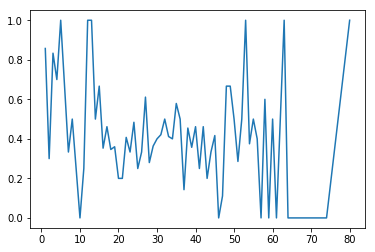

In [58]:
for age in age_range:
    age_survival_rates[age] = survival_rate_by_age(age)

    
ages = list(age_survival_rates.keys())
survival_rates = list(age_survival_rates.values())
plt.plot(ages, survival_rates)

In [133]:
age_groups_survival_rates = {0: 59.04, 15: 38.63 }
df = titanic_df[(titanic_df["Age"] <= 90) & (titanic_df["Age"] > 62)]
total = len(df)
survived = len(df[df["Survived"] == 1])
survived / total

0.2

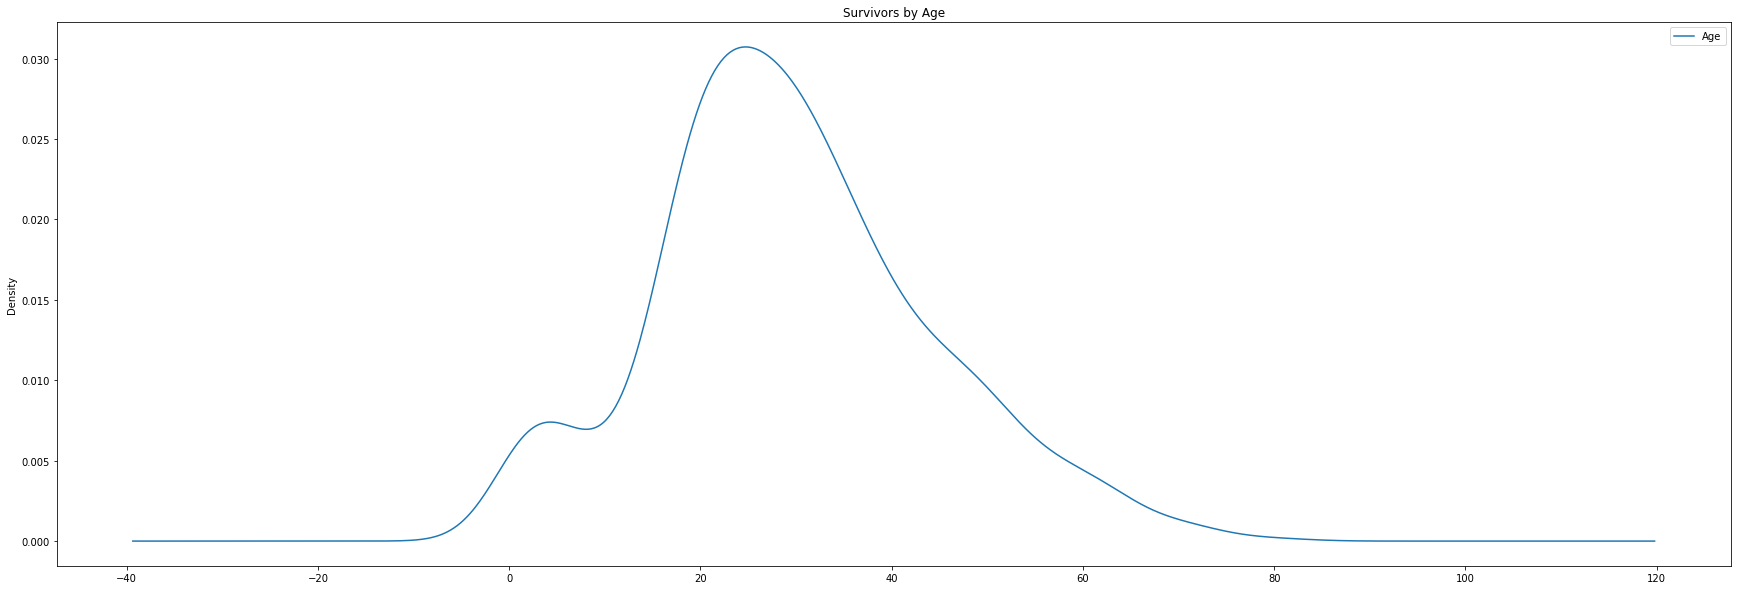

In [10]:
# titanic_df.hist("Age", bins=80)
titanic_df.plot(title="Survivors by Age", y="Age", kind="density", figsize=(30,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ba48240>]], dtype=object)

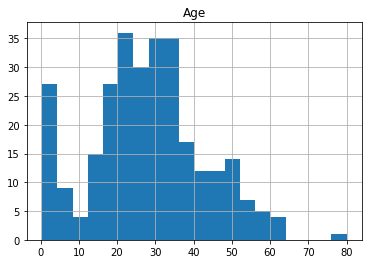

In [21]:
survived_df.hist("Age", bins=20)
# survived_df.plot(title="Survivors by Age", y="Age", kind="density", figsize=(30,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1af61c88>]], dtype=object)

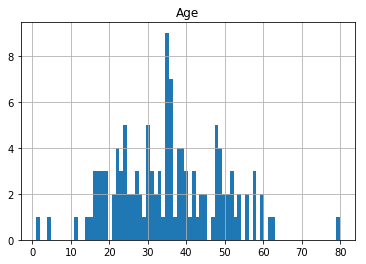

In [12]:
survived_df[survived_df["Pclass"] == 1].hist("Age", bins=80)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b418eb8>]], dtype=object)

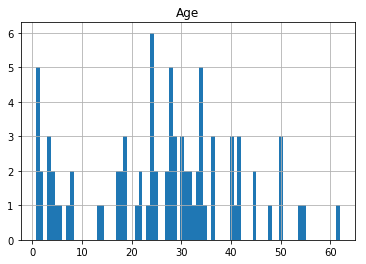

In [13]:
survived_df[survived_df["Pclass"] == 2].hist("Age", bins=80)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b5af4e0>]], dtype=object)

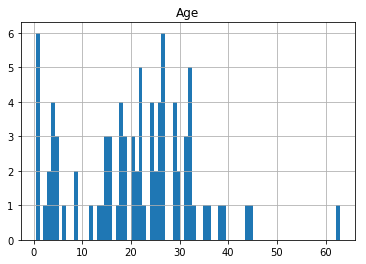

In [14]:
survived_df[survived_df["Pclass"] == 3].hist("Age", bins=80)

In [23]:
age_class = []


# for age in age_range:
#     for class_num in range(1, 4):


In [30]:
def survival_rates_age_class(age, pclass):
    age_class_df = titanic_df[(titanic_df["Age"] <= age) & (titanic_df["Age"] > age - 1) & (titanic_df["Pclass"] == pclass)]
    age_class_total = len(age_class_df)
    age_class_survived = len(age_class_df[age_class_df["Survived"] == 1])
    if (age_class_total <= 0):
        return None
    survival_rate = age_class_survived / age_class_total
    return survival_rate

In [39]:
columns = ["Age", "Pclass", "Total", "Survival Rate"]
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [38]:
survival_rates_df = pd.DataFrame({"Age": titanic_df["Age"], "Pclass": titanic_df["Pclass"]})
survival_rates_df

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2


In [ ]:

for age in age_range:
    for class_num in range(1,4):
#         df = titanic_df[(titanic_df["Age"] <= age) & (titanic_df["Age"] > age - 1) & (titanic_df["Pclass"] == class_num)])
#         total = len(df)
#         survived = len(df[df["Survived"] == 1])
#         survival_rate = survived / total